In [49]:
import numpy as np
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [50]:
def split_digits(X, y):
    '''
    Implementing the customary split of the Digits dataset into 
    1000 training and 1000 testing examples. Rows 0-100 are
    training examples, 101-200 are testing examples, 201-300
    are training examples, and so on.
    ---------------
    Input arguments: 
    X:  matrix of dimension 2000 x 240
        contains intensity values of 240 pixels for 2000
        greyscale images of digits, values range from [0,6]
    y:  vector of length 2000
        contains labels {0,1,2,3,4,5,6,7,8,9}
    '''

    X_train = np.array(X[0:100])
    y_train = np.array(y[0:100])

    end = 300
    for i in range(9):
        start = end - 100
        X_train = np.append(X_train, X[start:end], axis=0)
        y_train = np.append(y_train, y[start:end], axis=0)
        end += 200 

    X_test = np.array(X[100:200])
    y_test = np.array(y[100:200])

    end = 400
    for i in range(9):
        start = end - 100
        X_test = np.append(X_test, X[start:end], axis=0)
        y_test = np.append(y_test, y[start:end], axis=0)
        end += 200 

    return X_train, y_train, X_test, y_test

In [51]:
# import dataset
with open('/Users/noaschwensfeier/ML_PYTHON/Machine_learning_Project/dataset.txt','r') as data:
    X = [line.strip().split("  ") for line in data]
    y = [i for i in range(10) for j in range(200)] # create labels

X = np.array(X, dtype=np.int32)
y = np.array(y)
#print(X.shape)
#print(y.shape)

N = X.shape[0]
n = X.shape[1]
print(n)


240


In [52]:
# split dataset into 50/50 according to custom in Digits dataset
X_train, y_train, X_test, y_test = split_digits(X,y)

In [6]:
#C_list = [0.001, 0.01, 0.1, 1] #regularization
n_comp_list = np.linspace(2,240, 240-1)
results = np.empty((240, 3))
colnames = ['n_comp', 'empirical_risk', 'risk']
iter = 0

#for c in C_list: 

for  n_comp in n_comp_list:

    n_comp = int(n_comp)
    
    # dimensionality reduction 
    pca = PCA(n_components=n_comp, svd_solver='full')
    X_cmpr = pca.fit_transform(X_train)

    # logistic regression
    classifier = LogisticRegression(penalty='l2', solver='saga', tol=.1, multi_class='multinomial')
    classifier.fit(X_cmpr, y_train) #fit to train data
    #train_score = classifier.score(X_cmpr, y_train) #calculate train acc

    X_cmpr_test = pca.transform(X_test) #project test data to same lower-dim space
    test_score = classifier.score(X_cmpr_test, y_test) #calculate test acc

    results[iter, 0] = n_comp
    #results[iter, 1] = train_score
    results[iter, 2] = test_score

    iter +=1

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 

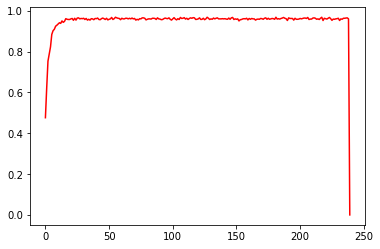

In [7]:
#print(results)
#plt.plot(range(240), results[:,1], color='blue')
plt.plot(range(240), results[:,2], color='red')

In [56]:
n_comp_list = np.linspace(2,240, 240-1)
results = np.empty((10, 240-1, 2)) #k-folds x n_comp x results
colnames = ['n_comp', 'empirical_risk', 'risk']
n_iter = 0
k_iter = 0

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for  n_comp in n_comp_list:

    n_comp = int(n_comp)

    for train_index, test_index in kf.split(X_train):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_tmp, X_test_tmp = X_train[train_index], X_train[test_index]
        y_train_tmp, y_test_tmp = y_train[train_index], y_train[test_index]
    
        # dimensionality reduction 
        pca = PCA(n_components=n_comp, svd_solver='full')
        X_train_cmpr = pca.fit_transform(X_train_tmp)

        # logistic regression
        classifier = LogisticRegression(penalty='l2', solver='saga', tol=.1, multi_class='multinomial')
        classifier.fit(X_train_cmpr, y_train_tmp) #fit to train data
        train_score = classifier.score(X_train_cmpr, y_train_tmp) #calculate train acc

        X_test_cmpr = pca.transform(X_test_tmp) #project test data to same lower-dim space
        test_score = classifier.score(X_test_cmpr, y_test_tmp) #calculate test acc

        results[k_iter, n_iter, 0] = train_score
        results[k_iter, n_iter, 1] = test_score

        if k_iter == 0:
            k_iter += 1
        elif k_iter % 9 == 0:
            k_iter = 0
        else:
            k_iter += 1

    n_iter += 1

(239, 2)


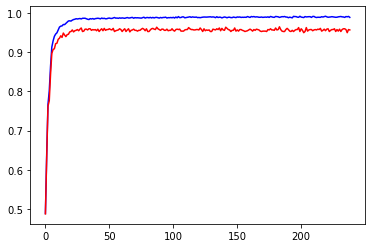

In [61]:
avg_results = np.empty((240-1,2))
avg_results = np.mean(results, axis=0)
print(avg_results.shape)

#print(results)
plt.plot(range(240-1), avg_results[:,0], color='blue', label='train error')
plt.plot(range(240-1), avg_results[:,1], color='red', label='test error')